## Загрузим данные

In [1]:
%pip install gdown

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
RANDOM_STATE=42

In [4]:
CARS_FILE_ID = '1zl7HAtBCxTFYkaj871a7BkT9X3CVSpME'

random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

!gdown --id {CARS_FILE_ID}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1zl7HAtBCxTFYkaj871a7BkT9X3CVSpME
From (redirected): https://drive.google.com/uc?id=1zl7HAtBCxTFYkaj871a7BkT9X3CVSpME&confirm=t&uuid=73c8ab72-2e08-467e-baff-74f63753cf08
To: /content/dataset_with_new_features.csv
100% 706M/706M [00:15<00:00, 44.2MB/s]


In [5]:
import pandas as pd

df = pd.read_csv('dataset_with_new_features.csv', low_memory=False)
print(df.shape)

(604046, 352)


In [6]:
df.sample(10)

,production_year,mileage,condition,owners_number,accidents_resolution,region,seller_type,brand,model,body_type,...,seats_num,doors_to_seats_ratio,has_accident,num_binary_features,safety_feature_count,comfort_feature_count,num_presets,is_new,is_very_old,is_one_owner
436946,2024,0,CONDITION_OK,0,OK,Санкт-Петербург,COMMERCIAL,Skoda,Karoq,ALLROAD_5_DOORS,...,5.0,1.0,1,1,0,8,1,1,0,0
329728,2020,40460,CONDITION_OK,1,ERROR,Москва,PRIVATE,Mercedes-Benz,E-Класс,COUPE_HARDTOP,...,5.0,0.4,1,1,1,7,1,0,0,1
343496,2000,380000,CONDITION_OK,4,OK,Москва,PRIVATE,Mercedes-Benz,M-Класс,ALLROAD_5_DOORS,...,5.0,1.0,1,1,0,4,2,0,1,0
439783,2019,170000,CONDITION_OK,1,ERROR,Москва,PRIVATE,Skoda,Octavia,LIFTBACK,...,5.0,1.0,1,1,1,10,1,0,0,1
550844,2023,107,CONDITION_OK,1,OK,Краснодар,PRIVATE,Lada (ВАЗ),Largus,WAGON_5_DOORS,...,5.0,1.0,1,1,0,5,2,1,0,1
431807,2015,110727,CONDITION_OK,1,OK,Уфа,COMMERCIAL,Renault,Sandero,HATCHBACK_5_DOORS,...,5.0,1.0,1,1,1,6,2,0,0,1
167063,2024,0,CONDITION_OK,0,OK,Химки,COMMERCIAL,Genesis,GV80 Coupe,ALLROAD_5_DOORS,...,5.0,1.0,1,1,5,15,0,1,0,0
391522,2022,13000,CONDITION_OK,0,OK,Владивосток,COMMERCIAL,Nissan,X-Trail,ALLROAD_5_DOORS,...,5.0,1.0,1,1,0,4,2,0,0,0
210052,2024,100,CONDITION_OK,1,OK,Новосибирск,PRIVATE,Hyundai,Elantra,SEDAN,...,5.0,0.8,1,1,0,3,1,1,0,1
46816,2024,34,CONDITION_OK,1,OK,Москва,COMMERCIAL,BMW,X5,ALLROAD_5_DOORS,...,5.0,1.0,1,1,0,4,1,1,0,1


## Обучим LightGBM

In [7]:
!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
X = df.drop('log_price', axis=1)
y = df['log_price']

In [10]:
num_features = X.select_dtypes(include=['int64', 'float64', 'int8']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [11]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_features),
])

In [12]:
param = {
    'n_estimators': 1828,
    'learning_rate': 0.05930396196813868,
    'num_leaves': 231,
    'max_depth': 20,
    'subsample': 0.5848815693903193,
    'colsample_bytree': 0.7082366853043143,
    'reg_alpha': 0.00027775655371692815,
    'reg_lambda': 3.7302584109152244e-06,
    'min_child_weight': 1,
    'device':'gpu',
    'random_seed':RANDOM_STATE,
    'verbose':-1
}

lgbm_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('model', LGBMRegressor(**param))
])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [14]:
lgbm_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['production_year', 'mileage',
                                                   'owners_number',
                                                   'doors_count',
                                                   'engine_displacement',
                                                   'engine_power', 'fuel_rate',
                                                   'medium',
                                                   'description_using_yagpt',
                                                   'NFS_2015_CARS',
                                                   'vin_checked', 'large',
                                                   'without_mileage_in_russia',
                                                   'vin_service_history',
                                                   'real_photo',
                                                   'certificate_avilon_war...
                                                   'body_type', 'seats',
                                                   'steering_wheel',
                                                   'price_segment',
                                                   'auto_class'])])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.7082366853043143,
                               device='gpu', learning_rate=0.05930396196813868,
                               max_depth=20, min_child_weight=1,
                               n_estimators=1828, num_leaves=231,
                               random_seed=42, reg_alpha=0.00027775655371692815,
                               reg_lambda=3.7302584109152244e-06,
                               subsample=0.5848815693903193, verbose=-1))])

In [15]:
y_pred_lgbm = lgbm_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
r2_lgbm  = r2_score(y_test, y_pred_lgbm)

In [17]:
print("LightGBM:")
print(f"  MSE:  {mse_lgbm:.2f}")
print(f"  MAE:  {mae_lgbm:.2f}")
print(f"  R^2:  {r2_lgbm:.2f}")

LightGBM:
  MSE:  0.02
  MAE:  0.08
  R^2:  0.98


In [18]:
model = lgbm_pipeline.named_steps['model']
preproc = lgbm_pipeline.named_steps['preproc']
feature_names = preproc.get_feature_names_out()

importances = model.feature_importances_

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)
top = feat_imp.head(20)
print(top)

                                  feature  importance
0                             cat__region       20531
1                    num__milage_per_year       17135
2                              cat__model       13405
3                     num__owners_x_power       10898
4                   num__power_div_owners       10864
5                   num__poly_mileage age       10678
6       num__poly_engine_displacement age       10320
7            num__log_mileage_x_log_power       10283
8                      num__power_to_disp       10018
9                          num__fuel_rate        9970
10                     num__disp_per_mile        9942
11               num__log_age_x_log_power        9838
12                             cat__brand        9447
13  num__poly_mileage engine_displacement        9208
14                   num__disp_div_owners        9183
15             num__poly_engine_power age        8258
16                    num__fuel_div_power        8120
17         num__poly_mileage

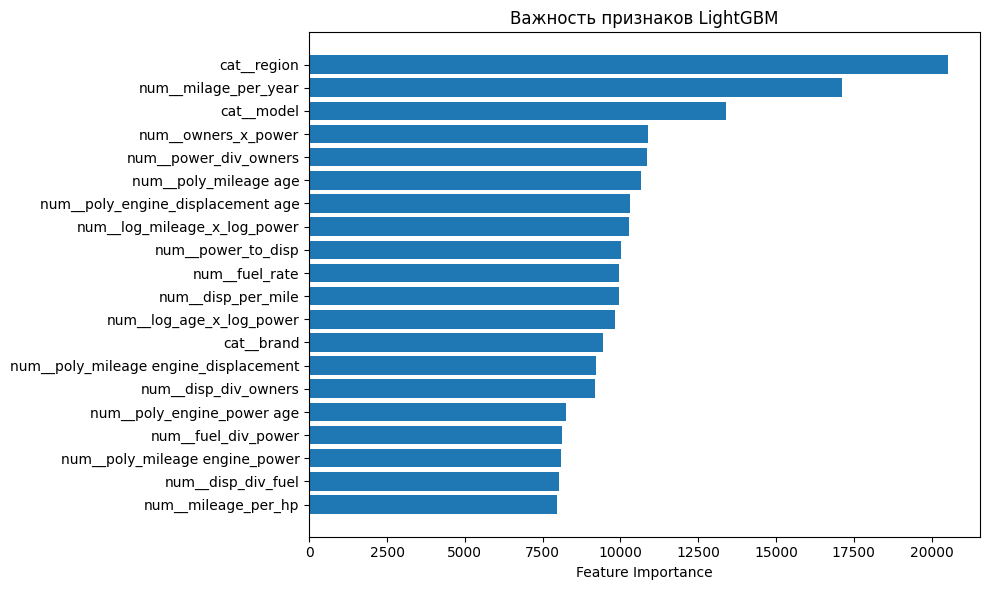

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top['feature'], top['importance'])
plt.xlabel('Feature Importance')
plt.title('Важность признаков LightGBM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Обучим Catboost

In [20]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
X = df.drop('log_price', axis=1)
y = df['log_price']

In [23]:
num_features = X.select_dtypes(include=['int64', 'float64', 'int8']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [24]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_features),
])

In [25]:
param = {
    'iterations': 1003,
    'learning_rate': 0.09702603811009403,
    'depth': 10,
    'l2_leaf_reg': 0.11642963038174498,
    'loss_function': 'RMSE',
    'border_count': 62,
    'random_seed': 42,
    'verbose': False,
    'gpu_ram_part': 0.8,
    'task_type': 'GPU',
    'devices': '0'
}

cat_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('model', CatBoostRegressor(**param))
])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [27]:
cat_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['production_year', 'mileage',
                                                   'owners_number',
                                                   'doors_count',
                                                   'engine_displacement',
                                                   'engine_power', 'fuel_rate',
                                                   'medium',
                                                   'description_using_yagpt',
                                                   'NFS_2015_CARS',
                                                   'vin_checked', 'large',
                                                   'without_mileage_in_russia',
                                                   'vin_service_history',
                                                   'real_photo',
                                                   'certificate_avilon_war...
                                                   'preset.nadezhnie_yaponskie_avto_starshe_10_let',
                                                   'certificate_pango_select',
                                                   'certificate_KiaSure', ...]),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['condition',
                                                   'accidents_resolution',
                                                   'region', 'seller_type',
                                                   'brand', 'model',
                                                   'body_type', 'seats',
                                                   'steering_wheel',
                                                   'price_segment',
                                                   'auto_class'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7bef09dc64d0>)])

In [28]:
y_pred_cat  = cat_pipeline.predict(X_test)

In [29]:
mse_cat = mean_squared_error(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat  = r2_score(y_test, y_pred_cat)

In [30]:
print("CatBoost:")
print(f"  MSE:  {mse_cat:.2f}")
print(f"  MAE:  {mae_cat:.2f}")
print(f"  R^2:  {r2_cat:.2f}")

CatBoost:
  MSE:  0.03
  MAE:  0.09
  R^2:  0.98


In [31]:
model = cat_pipeline.named_steps['model']
preproc = cat_pipeline.named_steps['preproc']
feature_names = preproc.get_feature_names_out()

importances = model.get_feature_importance(type='FeatureImportance')

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)
top = feat_imp.head(20)
print(top)

                            feature  importance
0                   num__square_age    8.658112
1                   num__poly_age^2    7.059987
2                cat__price_segment    6.137432
3                   cat__auto_class    4.846663
4               num__mileage_per_hp    4.407203
5                        cat__brand    3.973288
6              num__increased_price    3.312386
7            num__power_div_mileage    3.082614
8          num__poly_engine_power^2    2.914758
9              num__production_year    2.892075
10              num__power_div_fuel    2.785275
11                       cat__model    2.657433
12               num__power_to_disp    2.529541
13               num__disp_per_mile    2.409463
14         num__square_engine_power    2.108715
15              num__fuel_div_power    1.979251
16                   cat__body_type    1.618400
17  num__poly_engine_displacement^2    1.501211
18            num__log_engine_power    1.349718
19  num__square_engine_displacement    1

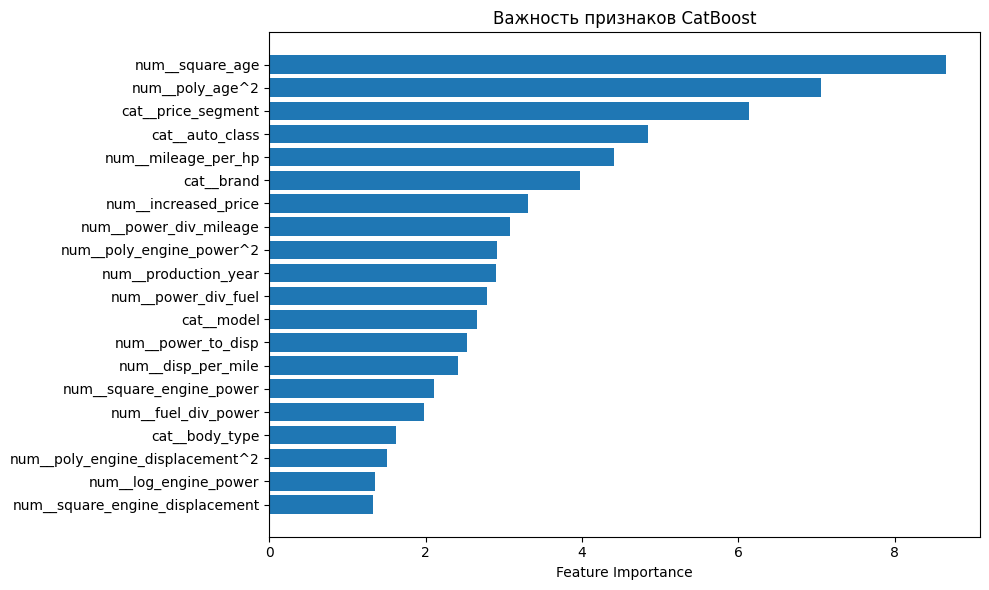

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top['feature'], top['importance'])
plt.xlabel('Feature Importance')
plt.title('Важность признаков CatBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Соберем метрики в одном месте

In [33]:
print("LightGBM:")
print(f"  MSE:  {mse_lgbm:.2f}")
print(f"  MAE:  {mae_lgbm:.2f}")
print(f"  R^2:  {r2_lgbm:.2f}")

print("CatBoost:")
print(f"  MSE:  {mse_cat:.2f}")
print(f"  MAE:  {mae_cat:.2f}")
print(f"  R^2:  {r2_cat:.2f}")

LightGBM:
  MSE:  0.02
  MAE:  0.08
  R^2:  0.98
CatBoost:
  MSE:  0.03
  MAE:  0.09
  R^2:  0.98


Посмотрим на бизнес метрики

In [34]:
def business_mae(y_true_log, y_pred_log):
    """Средняя абсолютная ошибка в рублях"""
    y_true_rub = np.exp(y_true_log)
    y_pred_rub = np.exp(y_pred_log)
    return np.mean(np.abs(y_true_rub - y_pred_rub))

def acceptable_rate(y_true_log, y_pred_log, threshold=0.1):
    """Доля предсказаний в пределах ±threshold%"""
    y_true_rub = np.exp(y_true_log)
    y_pred_rub = np.exp(y_pred_log)
    rel_error = np.abs((y_true_rub - y_pred_rub) / y_true_rub)
    return np.mean(rel_error <= threshold) * 100


In [35]:
y_test_rub = np.exp(y_test)
y_pred_lgbm_rub = np.exp(y_pred_lgbm)
y_pred_cat_rub = np.exp(y_pred_cat)

In [36]:
business_mae_lgbm = business_mae(y_test, y_pred_lgbm)
acc_rate_lgbm = acceptable_rate(y_test, y_pred_lgbm)

mse_lgbm_rub = mean_squared_error(y_test_rub, y_pred_lgbm_rub)
mae_lgbm_rub = mean_absolute_error(y_test_rub, y_pred_lgbm_rub)
r2_lgbm_rub  = r2_score(y_test_rub, y_pred_lgbm_rub)

In [37]:
business_mae_cat = business_mae(y_test, y_pred_cat)
acc_rate_cat = acceptable_rate(y_test, y_pred_cat)

mse_cat_rub = mean_squared_error(y_test_rub, y_pred_cat_rub)
mae_cat_rub = mean_absolute_error(y_test_rub, y_pred_cat_rub)
r2_cat_rub  = r2_score(y_test_rub, y_pred_cat_rub)

In [38]:
print("LightGBM:")
print(f"  BUSINESS MAE:     {business_mae_lgbm:.2f}")
print(f"  ACCEPTABLE RATE:  {acc_rate_lgbm:.2f}")
print(f"  MSE RUB:          {mse_lgbm_rub:.2f}")
print(f"  MAE RUB:          {mae_lgbm_rub:.2f}")
print(f"  R^2 RUB:          {r2_lgbm_rub:.2f}")


print("CatBoost:")
print(f"  BUSINESS MAE:     {business_mae_cat:.2f}")
print(f"  ACCEPTABLE RATE:  {acc_rate_cat:.2f}")
print(f"  MSE RUB:          {mse_cat_rub:.2f}")
print(f"  MAE RUB:          {mae_cat_rub:.2f}")
print(f"  R^2 RUB:          {r2_cat_rub:.2f}")

LightGBM:
  BUSINESS MAE:     184725.74
  ACCEPTABLE RATE:  77.13
  MSE RUB:          5247488727189.13
  MAE RUB:          184725.74
  R^2 RUB:          0.81
CatBoost:
  BUSINESS MAE:     232611.11
  ACCEPTABLE RATE:  70.33
  MSE RUB:          6255746548206.47
  MAE RUB:          232611.11
  R^2 RUB:          0.78
